SOURCE: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import sys

for i in ['talos', 'wrangle', 'astetik']:
    sys.path.insert(0, '/Users/mikko/Documents/GitHub/' + i)

In [2]:
import wrangle
import talos
import pandas as pd
import numpy as np

import astetik
%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('telco-customer-churn.zip')

In [4]:
df = wrangle.df_fill_empty(df, np.nan)
wrangle.df_find_nan(df)

,no_nans,quality
customerID,True,1.000000
gender,True,1.000000
SeniorCitizen,True,1.000000
Partner,True,1.000000
Dependents,True,1.000000
tenure,True,1.000000
PhoneService,True,1.000000
MultipleLines,True,1.000000
InternetService,True,1.000000
OnlineSecurity,True,1.000000


In [5]:
df = wrangle.df_drop_nanrows(df)

In [6]:
wrangle.df_find_nan(df)

,no_nans,quality
customerID,True,1.0
gender,True,1.0
SeniorCitizen,True,1.0
Partner,True,1.0
Dependents,True,1.0
tenure,True,1.0
PhoneService,True,1.0
MultipleLines,True,1.0
InternetService,True,1.0
OnlineSecurity,True,1.0


In [7]:
df.dtypes

customerID          object
gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [8]:
wrangle.df_count_uniques(df)

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [9]:
df = wrangle.df_to_multilabel(df, max_uniques=4, ignore_y='Churn')

In [10]:
df = wrangle.df_rename_cols(df)

In [12]:
customer_id = df[['C0']]

In [13]:
df.drop('C0', 1, inplace=True)

In [14]:
df = wrangle.col_move_place(df, 'C4', 'last')

In [15]:
df = wrangle.df_rename_col(df, 'C4', 'Y')

In [16]:
df = wrangle.col_to_biclass(df, 'Y', 'Yes')

In [17]:
df = wrangle.df_to_numeric(df)

In [18]:
df[['C1', 'C2', 'C3']] = wrangle.df_rescale_meanzero(df[['C1', 'C2', 'C3']])

In [20]:
x, y = wrangle.df_to_xy(df, 'Y')

In [21]:
x.shape

(7032, 46)

In [22]:
y.shape

(7032,)

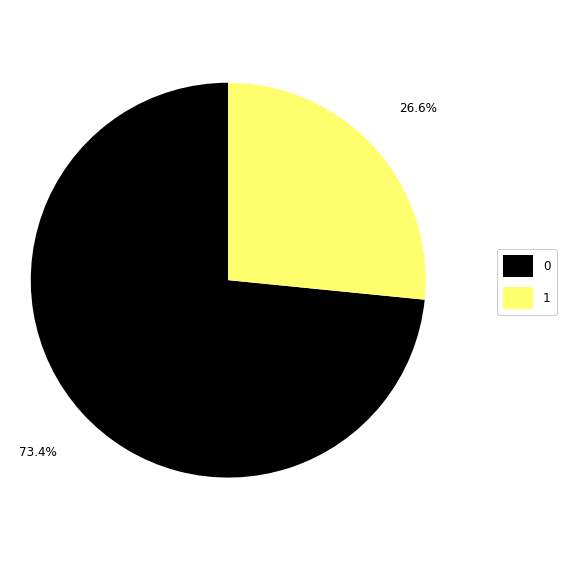

In [24]:
astetik.pie(df,  'Y', palette='colorblind')

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [36]:
model = Sequential()

In [42]:
# input layer
model.add(Dense(128, activation='relu', input_dim=x.shape[1]))
model.add(Dropout(.5))

In [43]:
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

In [44]:
# output layer
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [46]:
model.fit(x=x,
          y=y,
          batch_size=32,
          epochs=100,
          validation_split=.3)

Train on 4922 samples, validate on 2110 samples
Epoch 1/100
4922/4922 [==============================] - 4s 825us/step - loss: 0.5424 - acc: 0.7361 - val_loss: 0.4733 - val_acc: 0.7251
Epoch 2/100
4922/4922 [==============================] - 2s 319us/step - loss: 0.4473 - acc: 0.7434 - val_loss: 0.4747 - val_acc: 0.7953
Epoch 3/100
4922/4922 [==============================] - 2s 320us/step - loss: 0.4322 - acc: 0.7863 - val_loss: 0.4608 - val_acc: 0.7820
Epoch 4/100
4922/4922 [==============================] - 2s 326us/step - loss: 0.4343 - acc: 0.7938 - val_loss: 0.4594 - val_acc: 0.7853
Epoch 5/100
4922/4922 [==============================] - 2s 364us/step - loss: 0.4211 - acc: 0.8037 - val_loss: 0.4556 - val_acc: 0.7853
Epoch 6/100
4922/4922 [==============================] - 2s 433us/step - loss: 0.4215 - acc: 0.8013 - val_loss: 0.4557 - val_acc: 0.7919
Epoch 7/100
4922/4922 [==============================] - 2s 470us/step - loss: 0.4178 - acc: 0.8064 - val_loss: 0.4567 - val_acc: 

KeyboardInterrupt: 